# Ukraine War Sentiment Analysis

### Group 3:
Harsh Khatri

Nirbhay Malhotra​

Nishant Nadkarni

**Note:** Upload this notebook on colab to run with runtime type set to GPU. 

## Table of Contents
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[Introduction](#scrollTo=slgnrq9LKpCw)

1. [Setting up the environment](#scrollTo=ScAD1qFpKGk0)

2. [Data loading and preprocessing](#scrollTo=jmNnSKgYJ6b6)

3. [Countries Filtering](#scrollTo=v05rdtrgtGJL)

4. [Spam detection](#scrollTo=LxJ9jjCGJuq1)

5. [Sentiment analysis](#scrollTo=TQrw2SbuLICz)

6. [LDA](#scrollTo=_Gojl_ZHO_LA)

7. [Plots](#scrollTo=X7mm2qyIR9iV)

8. [Miscellaneous](#scrollTo=lNpImchrAmpc)

>8.1 [Sentiment Analysis Using Transformer Model](#scrollTo=I0hE9FZcLQwJ)

>8.2 [Spam detection using Hugging Face pre-trained model](#scrollTo=iEoFuBxetDc6)

9. [Datasets](#scrollTo=169h6YIbmzyJ)



## Introduction

The ongoing conflict between Russia and Ukraine has been a topic of global interest for the last two years. The war has led to loss of lives, displacement of people, and severe economic consequences in the region. As the conflict continues, it is important to understand the sentiments and opinions of people around the world towards this crisis. In this project, we present a country-wise sentiment analysis of the Russia-Ukraine war based on twitter data. By analyzing the sentiment of tweets from different countries, we aim to provide insights into how people from around the world perceive this conflict. This project provides a comprehensive overview of the sentiment trends and patterns in different regions, highlighting the key themes and opinions that are being expressed. Through this analysis, we hope to contribute to a better understanding of the global response to the Russia-Ukraine conflict.

## 1. Setting up the environment
Installing and importing libraries, cloning git repo for data and downloading dependencies

In [1]:
!pip install googletrans-py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 448.8 kB/s eta 0:00:00
  Created wheel for googletrans-py: filename=googletrans_py-4.0.0-py3-none-any.whl size=13135 sha256=c25b571f2088fa8b6f1a0bee67794661b3c9fbe3db8dda184c0b7f9e255b5635
  Stored in directory: /root/.cache/pip/wheels/5b/a3/b4/1d34a1edaec73dfb935c8a01c9430b80cf68236dbcaf54df53
Successfully built googletrans-py


In [2]:
import pandas as pd
import numpy as np
import os
import glob
import time
from tqdm import tqdm
from googletrans import Translator, constants

from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
from textblob import TextBlob
import pandas as pd
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import spacy
import re

import torch
import nltk
# from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

The following are spacy pipelines capable of various functionalities such as part of speech tagging, lemmatization, entity linking, tokenization, sentiment analysis and more corresponding to english, russian and ukrainian language respectively.

In [5]:
!python -m spacy download en_core_web_lg
!python -m spacy download ru_core_news_lg
!python -m spacy download uk_core_news_lg

2023-05-09 03:01:49.837411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
2023-05-09 03:02:39.211672: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.4/513.4 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=41

In case if you are getting the following error -
NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968
then uncomment and run the next cell

In [6]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [7]:
!git clone https://github.com/harsh242bu/rus_uk_twitter_data.git

Cloning into 'rus_uk_twitter_data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 19 (delta 1), reused 9 (delta 1), pack-reused 9
Unpacking objects: 100% (19/19), 202.92 MiB | 7.92 MiB/s, done.


## 2. Data loading and preprocessing
Involves keeping only english, russian and ukrainian tweets and dropping all other language tweets. It also drops 95% of the data for fast execution for this demonstration. 

Analyzing and comparing Twitter data of April 2022 and March 2023

In [8]:
file_1 = "rus_uk_twitter_data/0417_UkraineCombinedTweetsDeduped.csv.gzip"
file_2 = "rus_uk_twitter_data/20230303_UkraineCombinedTweetsDeduped.csv.gzip"
countries = pd.read_csv('rus_uk_twitter_data/countries states cities database/CSV/countries.csv')
cities = pd.read_csv('rus_uk_twitter_data/countries states cities database/CSV/cities.csv')
states = pd.read_csv('rus_uk_twitter_data/countries states cities database/CSV/states.csv')
df_2022 = pd.read_csv(file_1, compression='gzip', low_memory=False)
df_2023 = pd.read_csv(file_2, compression='gzip', low_memory=False)

In [9]:
df_2022.shape

(325909, 18)

In [10]:
df_2023.shape

(154484, 29)

In [11]:
df = pd.concat([df_2022, df_2023],axis=0)

In [12]:
imp_col = ['username', 'acctdesc', 'location', 'following', 'followers', 'tweetcreatedts', 'text', 'hashtags', 'language']
df[imp_col].head()

,username,acctdesc,location,following,followers,tweetcreatedts,text,hashtags,language
0,riffraffroy,NaN,"London, England",242,169,2022-04-17 00:00:00.000000,Welcome to Russia’s way! Why allow Russians i...,"[{'text': 'Spain', 'indices': [65, 71]}, {'tex...",en
1,GainMoneyFaster,𝙈𝙤𝙣𝙚𝙮 𝘾𝙤𝙖𝙘𝙝 showing you best Clever Passive In...,Bilbao,5683,5377,2022-04-17 00:00:00.000000,more than an idea - it's independence\n\nhttps...,"[{'text': 'passive', 'indices': [64, 72]}, {'t...",en
2,HitlerVladmir,Putin = war criminal,NaN,17,3,2022-04-17 00:00:00.000000,The worst situation in Mariupol. Mariupol is d...,[],en
3,DogandCatHelpe1,Shelter for abandoned dogs and cats. 1400 dogs...,Ukraine,5,31,2022-04-17 00:00:00.000000,"Barney. Positive, active, will make your life ...","[{'text': 'Ukraine', 'indices': [201, 209]}, {...",en
4,AnonGhostt,Secret for Public,UK,7,5033,2022-04-17 00:00:00.000000,The #Anonymous collective has sent 7.000.000 a...,"[{'text': 'Anonymous', 'indices': [21, 31]}]",en


In [13]:
df[imp_col].tail()

,username,acctdesc,location,following,followers,tweetcreatedts,text,hashtags,language
154479,KDunke,"Aligned with bonker fellas of twitter, see a f...",everywhere you are,3153,1074,2023-03-03 23:59:55,Putin has been humiliated on the world stage.\...,"[{'text': 'RussiaIsCollapsing', 'indices': [23...",en
154480,tweetMalena,#Resist! Stay & fight fascism\n🌊I'm a mom &❤er...,illegitimi non carborundum,42067,50752,2023-03-03 23:59:56,Putin has been humiliated on the world stage.\...,"[{'text': 'RussiaIsCollapsing', 'indices': [23...",en
154481,nasty_deo,🤍GOD❤️||Philosopher||Human Right & political A...,United State Of Nigeria 🇳🇬,335,360,2023-03-03 23:59:57,The only thing we should do now is to pray for...,"[{'text': 'PeterObiMyPresident', 'indices': [2...",en
154482,albafella1,Proud russophobe. Animal lover 🐆🐱🐶🦊🐺🦉🐬 #NAFO #...,"Langley, Virginia",3983,5014,2023-03-03 23:59:58,🇺🇦🦾 Close combat with the invaders on the outs...,"[{'text': 'Bakhmut', 'indices': [74, 82]}, {'t...",en
154483,ChichaRocXU,tomorrow start today,NaN,2492,472,2023-03-03 23:59:59,https://t.co/m5AWSt5Cgq #SoftaOfta #nightlife ...,"[{'text': 'SoftaOfta', 'indices': [24, 34]}, {...",und


In [14]:
df.shape

(480393, 29)

We believe English, Russian and Ukrainian are the three most important languages when working with Russia vs Ukraine data. Therefore we are filtering the data on these 3 languages.

In [15]:
languages = ['en', 'uk', 'ru']
def clean_up(cleanup_df):
    cleanup_df = cleanup_df[cleanup_df['language'].isin(languages)]
    if 'Unnamed: 0' in cleanup_df.columns:
        cleanup_df = cleanup_df.drop(['Unnamed: 0'], axis=1)
    cleanup_df = cleanup_df.reset_index(drop=True)
    
    return cleanup_df.copy()

In [16]:
df = clean_up(df)

In [17]:
df.shape

(325498, 28)

Our code is computation heavy. Given the limited resources of google colab we cannot run our code on whole dataset. Therefore, we are dropping 95% of the data.

In [18]:
fraction_to_drop = 0.95
df = df.drop(df.sample(frac=fraction_to_drop, random_state=2023).index).reset_index(drop=True)
df.shape

(16275, 28)

In [19]:
df

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username
0,152930351,AnonGhostt,Secret for Public,UK,7,5033,376501,2010-06-07 07:02:46.000000,1515480158265769988,2022-04-17 00:00:00.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1201865548801466371,DinkaKay,Content Creator: https://t.co/jMPIvl4iRq | Par...,"Mortoraa, Empire of Noxus",866,8907,11299,2019-12-03 14:07:44.000000,1515480201219686403,2022-04-17 00:00:10.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48638828,treego14,NaN,Iran,74,205,64597,2009-06-19 07:13:31.000000,1515480243263483909,2022-04-17 00:00:20.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1495891186158116875,A_Elbereth625,NaN,NaN,153,6,2435,2022-02-21 22:40:54.000000,1515480298737262598,2022-04-17 00:00:34.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2266240672,RcWildcherry,"Respiratory Therapist for Human Rights, Gay Pr...","Fort Smith, AR",2020,532,707,2014-01-07 03:16:47.000000,1515480328047140870,2022-04-17 00:00:41.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16270,4437451512,DatPhamn,NaN,Massachusettes.,197,75,25214,2015-12-03 02:47:01,1631806147198853120,2023-03-03 23:57:57,...,1.631646e+18,1.495481e+18,UAWeapons,0.000000e+00,0.000000e+00,NaN,False,0.0,0.0,NaN
16271,815947759178174464,_tomfreda,"Democracy activist, constitution junky - Tryin...","Toronto, Canada",638,265,2868,2017-01-02 15:48:00,1631806212923707392,2023-03-03 23:58:13,...,0.000000e+00,0.000000e+00,NaN,1.631801e+18,1.518721e+18,aj_Canada42,False,0.0,0.0,NaN
16272,1591218248711823364,MrBavovna,I like the look of burning russian military junk,NaN,1,967,315,2022-11-11 23:56:20,1631806229289771009,2023-03-03 23:58:17,...,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,False,0.0,0.0,NaN
16273,756653685493551105,CEk4lpe6ikzHDm,蔡榮義,台灣,1089,98,18203,2016-07-23 00:54:31,1631806438023774208,2023-03-03 23:59:06,...,1.631747e+18,1.489165e+18,Bundeskanzler,0.000000e+00,0.000000e+00,NaN,False,0.0,0.0,NaN


## 3. Countries Filtering

As seen, there are a lot of false locations in the data that we have. Even those that have proper location are not in the format we want i.e. just country name. For performing sentiment analysis and showing country wise score, we need to know exactly which country each tweeter belongs to. For this, we use another kaggle dataset that has all the countries, states and cities in the world. Using this, we filter through out tweets and add the updated location to the dataframe.

In [20]:
tot_drop = 0
tot_data = len(df)
tot_time = time.time()
# Dropping any rows that have nan in location 
temp = df.dropna(subset=['location'])
# Couting total dropped columns
tot_drop = len(df)-len(temp)
df = temp.reset_index(drop=True)
# Adding extra columns to dataframe
df["updated_location"] = ""
df["iso3"] = ""
df["latitude"] = ""
df["longitude"] = ""
drop_list=[]
start = time.time()
for i in tqdm(range(len(df['location']))):
    # Getting each location seperately eg. 'Boston, MA' becomes ['Boston', ' MA'] 
    locations = str(df['location'][i]).split(',')
    # Looping through each location
    for location in locations:
        # Remove any additional spaces in the location
        location = location.strip() 
        # Check if the location is present in the countries database
        if location.lower() in set(countries['name'].str.lower()):
            # If present, update necessary values and break out of loop (Since we have found the country)
            df.at[i,"updated_location"] = countries.loc[countries['name'].str.lower()==location.lower()]['name'].values[0]
            df.at[i,"iso3"] = countries.loc[countries['name'].str.lower()==location.lower()]['iso3'].values[0]
            df.at[i,"latitude"] = countries.loc[countries['name'].str.lower()==location.lower()]['latitude'].values[0]
            df.at[i,"longitude"] = countries.loc[countries['name'].str.lower()==location.lower()]['longitude'].values[0]
            break
        # Check if the location is present in the states database
        elif location.lower() in set(states['name'].str.lower()):
            # If present, find the corresponding iso2 value of the country
            iso2 = states.loc[states['name'].str.lower() == location.lower()]['country_code'].values[0]
            if iso2.lower()!='nan':
                # If not null,update the country's values based on the country's iso2 val and break out of loop
                updated_loc = countries.loc[countries['iso2'] == iso2]['name'].values[0]
                df.at[i,"updated_location"] = updated_loc
                df.at[i,"iso3"] = countries.loc[countries['iso2'] == iso2]['iso3'].values[0]
                df.at[i,"latitude"] = countries.loc[countries['iso2'] == iso2]['latitude'].values[0]
                df.at[i,"longitude"] = countries.loc[countries['iso2'] == iso2]['longitude'].values[0]
                break
        # Check if the location is present in the cities database
        elif location.lower() in set(cities['name'].str.lower()):
            # If present, find the corresponding iso2 value of the country
            iso2 = cities.loc[cities['name'].str.lower() == location.lower()]['country_code'].values[0]
            if str(iso2).lower()!='nan':
                # If not null,update the country's values based on the country's iso2 val and break out of loop
                updated_loc = countries.loc[countries['iso2'] == iso2]['name'].values[0]
                df.at[i,"updated_location"] = updated_loc
                df.at[i,"iso3"] = countries.loc[countries['iso2'] == iso2]['iso3'].values[0]
                df.at[i,"latitude"] = countries.loc[countries['iso2'] == iso2]['latitude'].values[0]
                df.at[i,"longitude"] = countries.loc[countries['iso2'] == iso2]['longitude'].values[0]
                break
    # If location is not updated i.e. the location was not found, add the row to be dropped
    if df["updated_location"][i]=="":
        drop_list.append(i)
        
# Get stats and drop all rows in drop_list
tot_drop += len(drop_list)
df.drop(drop_list, inplace = True)
df.reset_index(drop=True, inplace=True)
end = time.time()
print(i," tweets processed in ", (end-start)/60," mins")
print("All tweets processed")
print(tot_drop," tweets removed from ",tot_data," tweets")
print("Total time elapsed: ",(time.time()-tot_time)/60," mins")

100%|██████████| 9480/9480 [10:50<00:00, 14.57it/s]

9479  tweets processed in  10.844979921976725  mins
All tweets processed
10584  tweets removed from  16275  tweets
Total time elapsed:  10.84563479423523  mins


In [21]:
# pandas configuration
pd.set_option('display.max_columns', None)

In [22]:
cols_to_show = ['username', 'tweetcreatedts', 'text', 'language', 'location', "updated_location", "iso3", "latitude", "longitude"]
df[cols_to_show].head(10)

,username,tweetcreatedts,text,language,location,updated_location,iso3,latitude,longitude
0,AnonGhostt,2022-04-17 00:00:00.000000,The #Anonymous collective has sent 7.000.000 a...,en,UK,Russia,RUS,60.0,100.0
1,treego14,2022-04-17 00:00:20.000000,"Tomorrow at 12PM ET on @FoxNews, you can watch...",en,Iran,Iran,IRN,32.0,53.0
2,RcWildcherry,2022-04-17 00:00:41.000000,One of the partners of #WorldKitchen in #Ukrai...,en,"Fort Smith, AR",Canada,CAN,60.0,-95.0
3,azizmx,2022-04-17 00:00:49.000000,#British Special Forces resume training of #Uk...,en,"Sugar Land, Texas",United States,USA,38.0,-97.0
4,Shirley10090505,2022-04-17 00:01:03.000000,Russian forces hit a World Central Kitchen loc...,en,United States,United States,USA,38.0,-97.0
5,aahaake,2022-04-17 00:01:44.000000,Cemetery in #Irpin where victims of 🇷🇺 aggress...,en,"San Antonio, TX",Argentina,ARG,-34.0,-64.0
6,jayray_5,2022-04-17 00:01:49.000000,One of the partners of #WorldKitchen in #Ukrai...,en,"Ithaca, NY",United States,USA,38.0,-97.0
7,guidethisway,2022-04-17 00:01:57.000000,Support the @BlindUnion and the Unity Fund for...,en,Alaska,United States,USA,38.0,-97.0
8,BillStevensMUFC,2022-04-17 00:01:58.000000,"We all want peace, but reality is: If #Russia ...",en,"Sherwood Park, AB, Treaty 6",Canada,CAN,60.0,-95.0
9,Jringo1508,2022-04-17 00:02:20.000000,Were there #nuclear weapons on the #Moskva? Un...,en,Chattanooga,United States,USA,38.0,-97.0


As seen above, the algorithm mostly does a good job of understanding the correct location of a tweet. However, some US tweets get misclassified. Also unfortunately the way the algorithm is built, all tweets that that have UK as their location get classified as Russia since Uk is a town in Russia. Since we could not rerun all (Total processing time of this section was around 34 hours for this project) this to get the plots again, we have not fixed these issues in this report.

Previously we had employed KNN to find locations based on longitude and latitude while using a different dataset but we stopped using that in favor of this one since very few tweets had the longitude and latitude column filled.

## 4. Spam detection

Effective spam detection plays a critical role in Twitter data analysis as it helps ensure the accuracy and reliability of sentiment analysis results. Twitter is often flooded with repetitive tweets originating from bots and fake user accounts. Failure to filter out these repetitive tweets can significantly bias sentiment analysis towards a particular perspective. Within the realm of spam, we can identify two distinct types. The first type encompasses promotional tweets that solely aim to advertise products, exploiting hashtags related to Russia versus Ukraine to gain popularity. The second type comprises repetitive tweets originating from bots and fake user accounts. For this project, our primary focus is on mitigating the impact of the latter type of spam.

Creating three dataframes corresponding to each language, since we have three separate spacy pipelines to work with.

In [23]:
en_df = pd.DataFrame(df[df["language"] == "en"]["text"])
ru_df = pd.DataFrame(df[df["language"] == "ru"]["text"])
uk_df = pd.DataFrame(df[df["language"] == "uk"]["text"])

Storing and resetting the original index because it will be useful later on for filtering out the spam.

In [24]:
en_df["ind"] = en_df.index
ru_df["ind"] = ru_df.index
uk_df["ind"] = uk_df.index

In [25]:
en_df = en_df.reset_index(drop=True)
ru_df = ru_df.reset_index(drop=True)
uk_df = uk_df.reset_index(drop=True)

In [26]:
print("en_df:", en_df.shape)
print("ru_df:", ru_df.shape)
print("uk_df:", uk_df.shape)

en_df: (5572, 2)
ru_df: (54, 2)
uk_df: (65, 2)


Using GPU accelaration for fast processing

In [27]:
spacy.prefer_gpu()

True

Loading the spacy language pipelines for text analysis

In [28]:
nlp_en = spacy.load("en_core_web_lg")
nlp_ru = spacy.load("ru_core_news_lg")
nlp_uk = spacy.load("uk_core_news_lg")

In [29]:
text_arr_en = en_df["text"].values
text_arr_ru = ru_df["text"].values
text_arr_uk = uk_df["text"].values

Creating a nlp document using the language pipeline. To create nlp document, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps including a tagger, a lemmatizer, a parser and an entity recognizer. This document is later used for spam detection and sentiment analysis.


Creating 3 nlp documents corresponding to each language

In [30]:
start = time.time()
docs_ru = list(nlp_ru.pipe(text_arr_ru, disable=["tagger", "parser", "attribute_ruler", "lemmatizer"]))
print(time.time() - start)

0.24918437004089355


In [31]:
start = time.time()
docs_uk = list(nlp_uk.pipe(text_arr_uk, disable=["tagger", "parser", "attribute_ruler", "lemmatizer"]))
print(time.time() - start)

0.25388145446777344


In [32]:
start = time.time()
docs_en = list(nlp_en.pipe(text_arr_en, disable=["tagger", "parser", "attribute_ruler", "lemmatizer"]))
print(time.time() - start)

16.92250370979309


Initializing empty similarity matrix to store similarity index of tweets 

In [33]:
sim_mat_en = np.zeros((len(text_arr_en), len(text_arr_en)), dtype=np.int8)
sim_mat_ru = np.zeros((len(text_arr_ru), len(text_arr_ru)), dtype=np.int8)
sim_mat_uk = np.zeros((len(text_arr_uk), len(text_arr_uk)), dtype=np.int8)

Choosing text similarity threshold as 97% to eliminate repetative tweets by bots

In [34]:
threshold = 0.97

Ideally we should compare each tweet with every other tweet to remove spam but our algorithm's runtime is $O(n^2)$. Therefore, we are comparing tweets in small batches.

Comparing text similarity of tweets in batches and storing the indices to remove these tweets later

In [35]:
batch_size = 400
# text_arr_en.shape[0] / batch_size

for h in tqdm(range(text_arr_ru.shape[0] // batch_size)):
    start = h*batch_size
    end = min((h+1)*batch_size - 1, text_arr_ru.shape[0] - 1)
    for i in range(start, end):
        for j in range(i + 1, end):
            if docs_ru[i].similarity(docs_ru[j]) > threshold:
                sim_mat_ru[i, j] = 1


0it [00:00, ?it/s]


In [36]:
batch_size = 400
# text_arr_en.shape[0] / batch_size

for h in tqdm(range(text_arr_uk.shape[0] // batch_size)):
    start = h*batch_size
    end = min((h+1)*batch_size - 1, text_arr_uk.shape[0] - 1)
    for i in range(start, end):
        for j in range(i + 1, end):
            if docs_uk[i].similarity(docs_uk[j]) > threshold:
                sim_mat_uk[i, j] = 1

0it [00:00, ?it/s]


Choosing small batch size for english language to reduce processing time

In [37]:
batch_size = 200
# text_arr_en.shape[0] / batch_size

for h in tqdm(range(text_arr_en.shape[0] // batch_size)):
    start = h*batch_size
    end = min((h+1)*batch_size - 1, text_arr_en.shape[0] - 1)
    for i in range(start, end):
        for j in range(i + 1, end):
            if docs_en[i].similarity(docs_en[j]) > threshold:
                sim_mat_en[i, j] = 1

100%|██████████| 27/27 [00:05<00:00,  5.07it/s]


In [38]:
def get_spam_idx(sm_mat, ln_df):
    temp = np.where(sm_mat == 1)
    idx_ln = np.unique(np.concatenate((temp[0], temp[1])))
    return ln_df["ind"].values[idx_ln], idx_ln

Extracting tweet indices from similarity matrix

In [39]:
spam_ind_ru, idx_ru = get_spam_idx(sim_mat_ru, ru_df)
spam_ind_uk, idx_uk = get_spam_idx(sim_mat_uk, uk_df)
spam_ind_en, idx_en = get_spam_idx(sim_mat_en, en_df)

In [40]:
ru_df = ru_df.drop(idx_ru).copy()
uk_df = uk_df.drop(idx_uk).copy()
en_df = en_df.drop(idx_en).copy()

Conacatinating all the spam indices from all 3 languages (english, russian and ukranian)

In [41]:
spam_index_df = np.concatenate((spam_ind_ru, spam_ind_uk, spam_ind_en))
spam_df = df.loc[df.index[spam_index_df]].copy()
spam_df.shape

(1754, 32)

Creating spam free dataframe

In [42]:
df_spam_free = df.drop(spam_index_df).copy()
df_spam_free.shape

(3937, 32)

In [43]:
spam_df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,is_retweet,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,updated_location,iso3,latitude,longitude
2,2266240672,RcWildcherry,"Respiratory Therapist for Human Rights, Gay Pr...","Fort Smith, AR",2020,532,707,2014-01-07 03:16:47.000000,1515480328047140870,2022-04-17 00:00:41.000000,97,One of the partners of #WorldKitchen in #Ukrai...,"[{'text': 'WorldKitchen', 'indices': [40, 53]}...",en,NaN,0,2022-04-17 00:22:11.566196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAN,60.0,-95.0
4,710183821120020481,Shirley10090505,I was born,United States,3364,396,764840,2016-03-16 19:19:52.000000,1515480423916265474,2022-04-17 00:01:03.000000,220,Russian forces hit a World Central Kitchen loc...,"[{'text': 'Kharkiv', 'indices': [74, 82]}]",en,NaN,0,2022-04-17 00:22:10.665350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,38.0,-97.0
5,836448977335762944,aahaake,"Retired Trial lawyer, San Antonio native, Spur...","San Antonio, TX",186,139,31884,2017-02-28 05:32:31.000000,1515480595761094657,2022-04-17 00:01:44.000000,568,Cemetery in #Irpin where victims of 🇷🇺 aggress...,"[{'text': 'Irpin', 'indices': [33, 39]}]",en,NaN,0,2022-04-17 00:40:10.530731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Argentina,ARG,-34.0,-64.0
6,40567549,jayray_5,single Dad with 4 daughters. get the jab. BBB....,"Ithaca, NY",1895,1274,515,2009-05-16 23:47:07.000000,1515480614950125568,2022-04-17 00:01:49.000000,97,One of the partners of #WorldKitchen in #Ukrai...,"[{'text': 'WorldKitchen', 'indices': [40, 53]}...",en,NaN,0,2022-04-17 00:22:09.785060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,38.0,-97.0
10,1469406513429106690,nursing_podcast,New Podcast.,"Brooklyn, New York, USA",121,51,10842,2021-12-10 20:40:07.000000,1515481213879963656,2022-04-17 00:04:12.000000,1,"#SupportUkraine Rainbow 🌈 Cares, a fundraisin...","[{'text': 'SupportUkraine', 'indices': [0, 15]...",en,NaN,0,2022-04-17 00:40:09.056039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia,AUS,-27.0,133.0


Spam examples -

In [44]:
cols_to_show = ['username','acctdesc','iso3','text','hashtags','language']
spam_df[cols_to_show].loc[[2,6]]

,username,acctdesc,iso3,text,hashtags,language
2,RcWildcherry,"Respiratory Therapist for Human Rights, Gay Pr...",CAN,One of the partners of #WorldKitchen in #Ukrai...,"[{'text': 'WorldKitchen', 'indices': [40, 53]}...",en
6,jayray_5,single Dad with 4 daughters. get the jab. BBB....,USA,One of the partners of #WorldKitchen in #Ukrai...,"[{'text': 'WorldKitchen', 'indices': [40, 53]}...",en


## 5. Sentiment analysis

Our analysis focuses on popular locations and people associated with Russia and Ukraine, which we have identified as entities. We are utilizing Spacy NLP to perform sentiment analysis on tweets, with a specific focus on evaluating the sentiment expressed towards these entities. The analysis generates positive or negative sentiment scores that reflect the attitudes and opinions of Twitter users towards the identified entities. We have categorized the tweets into five distinct categories - pro-Russia, anti-Russia, pro-Ukraine, anti-Ukraine, and neutral - based on the sentiment expressed. In addition, we are also calculating a sentiment score, which provides a measure of the intensity or severity of the sentiment. This approach enables us to gain valuable insights into the sentiment landscape related to these entities, and to identify trends and patterns in the data that provide a deeper understanding of public attitudes and opinions towards Russia and Ukraine.

List of russian and ukrainian cities

In [45]:

russia_locations = ["moscow", "stpetersburg", "novosibirsk", "ekaterinburg", "nizhny novgorod", 
                    "kazan", "chelyabinsk", "omsk", "samara", "rostov-on-don", "ufa", "krasnoyarsk", 
                    "perm", "voronezh", "volgograd", "krasnodar", "saratov", "tyumen", "tolyatti", 
                    "izhevsk", "barnaul", "ulyanovsk", "irkutsk", "vladivostok", "yaroslavl", 
                    "makhachkala", "tomsk", "orenburg", "kemerovo", "naberezhnye chelny", "penza", 
                    "ryazan", "astrakhan", "belgrade",  "moskva", "sankt-peterburg","feodosia", "komsomolsk",
                     "krasnyi lyman", "ladyzhyn", "lisichansk", "Orenburg","Veliky Novgorod","Nizhny Novgorod","Cheboksary","Tver","Perm"]

In [46]:

ukraine_locations =["Kyiv" , "Kharkiv", "Odesa","Dnipro","Lviv","Kryvyi Rih",
                    "Mykolaiv","Vinnytsia","Chernihiv","Kherson","Poltava","Khmelnytskyi",
                    "Chernivtsi","Zhytomyr","Kamianske","Ternopil","Nikopol","Zaporizhzhia","Donetsk","Rivne","Sumy","Ivano-Frankivsk",
                    "Kropyvnytskyi","Kremenchuk","Lutsk","Bila Tserkva","Kramatorsk","Uzhhorod","Brovary","Sloviansk","Pavlohrad",
                    "Mukachevo","Konotop","Drohobych","Bakhmut","Novomoskovsk","Kovel","Smila","Kalush","Pervomaisk","Kolomyia",
                    "Chornomorsk","Izium","Fastiv","Lubny","Svitlovodsk","Varash","Dubno","Bucha","Boyarka","Sambir","Avdiivka","Synelnykove",
                    "Zolochiv","Koziatyn","Nadvirna","Vilnohirsk","Krolevets","Dolyna","Kalynivka","Karlivka","Pidhorodne"]

Helps in locating if the text is related to Russia or ukraine based on the locations mentioned in the text. We use the above cities mentioned here.

In [47]:
def locate_mentions(doc):
#     doc = nlp(comment)
    
    # Initialize an empty list for storing the detected entities
    entities = []
    # Loop through all the named entities detected by the spacy model
    for ent in doc.ents:
        # Check if the named entity is a geographic location 
        if ent.label_ == "GPE":
            # Check if the entity text contains the word "russia" or any location from the russia_locations list
            if "russia" in ent.text.lower() or any(loc.lower() in ent.text.lower() for loc in russia_locations):
                # Add russia to the list of detected entities
                entities.append("Russia")
            # Check if the entity text contains the word "ukraine" or any location from the ukraine_locations list
            elif "ukraine" in ent.text.lower() or any(loc.lower() in ent.text.lower() for loc in ukraine_locations):
                # Add ukraine to the list of detected entities
                entities.append("Ukraine")
        # Check if the named entity is a location 
        elif ent.label_ == "LOC":
            # Check if the entity text contains any location in the russia_locations list
            if any(loc.lower() in ent.text.lower() for loc in russia_locations):
                # Add russia to the list of detected entities
                entities.append("Russia")
            # Check if the entity text contains any location in the ukraine_locations list
            elif any(loc.lower() in ent.text.lower() for loc in ukraine_locations):
                # Add ukraine to the list of detected entities
                entities.append("Ukraine")
    # Loop through all the tokens in the document  
    for token in doc:
        # Check if the token is a proper noun
        if token.pos_ == "PROPN":
            # Check if the token text contains the word "russia" or any location in the russia_locaations list
            if "russia" in token.text.lower() or any(loc.lower() in token.text.lower() for loc in russia_locations):
                # Add russia to the list of detected entities
                entities.append("Russia")
            # Check if the token text contains the word "ukraine" or any location in the ukrain_locations list 
            elif "ukraine" in token.text.lower() or any(loc.lower() in token.text.lower() for loc in ukraine_locations):
                # Add ukraine to the list of detected entities
                entities.append("Ukraine")
        # Check if the token text matches any location in the  russian_locations list
        elif token.text.lower() in [loc.lower() for loc in russia_locations]:
            # Add russia to the list of detected entities
            entities.append("Russia")
        # Check if the token text matches any location in the ukraine_locations list
        elif token.text.lower() in [loc.lower() for loc in ukraine_locations]:
            # Add ukraine to the list of detected entities
            entities.append("Ukraine")
    # Returns the list of detected entities with duplicates removed
    return list(set(entities))

Judge() function is used for providing sentiment scores for the text after detecting if the sentence is regarding russia or ukraine or none of them based on russian or ukranian locations and russian or ukranian famous people, and it also helps in providing us if the text is neutral , pro - russia , against - russia , pro - ukraine or against - ukraine using the sentiment scores and checking if the sentence is related to russia or ukraine.


In [48]:
def judge(doc):
   
    # Initialize the TextBlob object
    blob = TextBlob(str(doc))
    
    # Define the famous people and their countries
    russia_famous = {'putin': 'russia', 'medvedev': 'russia', 'lavrov': 'russia'}
    ukraine_famous = {'poroshenko': 'ukraine', 'zelensky': 'ukraine', 'tymoshenko': 'ukraine'}
    
    # Define the categories and their corresponding score ranges
    categories = {'pro_russia': (0.1, 1), 'against_russia': (-1, -0.1),'pro_ukraine':(0.1,1),'against_ukraine':(-1,-0.1),'neutral':(0.1,1)}
    
    # Initialize the category scores to zero
    category_scores = {category: 0 for category in categories}
    
    # Check if Russia locations or famous people are mentioned in the comment
    entities = locate_mentions(doc)
    

    
    # Loop over each sentence
    for sentence in blob.sentences:
        # Convert the sentence to lowercase
        sentence = str(sentence).lower()
        
        # Initialize flag variables for whether each country was mentioned in the sentence
        russia_mentioned = False
        ukraine_mentioned = False
        russia_ment= False 
        russia_menti = False
        ukraine_ment= False 
        ukraine_menti = False
        # Check if the sentence contains the name of a famous person from Russia or Ukraine
        for famous,country in russia_famous.items():
            if famous in sentence:
                russia_ment = True
            
                break
        for famous, country in ukraine_famous.items():
            if famous in sentence:
                ukraine_ment = True
                break
                
        # Check if the sentence mentions Russia or Ukraine locations
        en = locate_mentions(doc)
        russia_menti = "Russia" in en
        ukraine_menti = "Ukraine" in en
        # Determine the sentiment of the sentence
        sentiment = TextBlob(sentence).sentiment.polarity
        if russia_ment or russia_menti:
            russia_mentioned = True
        if ukraine_ment or ukraine_menti:
            ukraine_mentioned = True
        # Update the score for the corresponding categories
        if russia_mentioned:
            if sentiment > 0.1:
                category_scores['pro_russia'] += 1
            else:
                category_scores['against_russia'] += 1
        
        if not russia_mentioned:
            if ukraine_mentioned:
                if sentiment > 0.1:
                    category_scores['pro_ukraine'] += 1
                else:
                    category_scores['against_ukraine'] += 1
                    
        # Check if only one category score is 1, and update the opposite category to 1
        if category_scores['pro_russia'] == 1:
            category_scores['against_ukraine'] = 1
        elif category_scores['against_russia'] == 1:
            category_scores['pro_ukraine'] = 1
        if category_scores['pro_ukraine'] == 1:
            category_scores['against_russia'] = 1
        elif category_scores['against_ukraine'] == 1:
            category_scores['pro_russia'] = 1
            
        # If neither russia nor ukraine is detected based on the locations and the famous people, we mark the sentence as neutral
        if not russia_mentioned:
            if not ukraine_mentioned:
                category_scores['neutral'] = 1


    
    # Determine the category with the highest score
    max_category = max(category_scores, key=category_scores.get)
    
    category_scores.update({'sentiment_val': sentiment})
    # Return the category with the highest score
    return category_scores

Here is an example of the following judge function :

In [49]:
judge(nlp_en("Kyiv is bad"))

{'pro_russia': 1,
 'against_russia': 0,
 'pro_ukraine': 0,
 'against_ukraine': 1,
 'neutral': 0,
 'sentiment_val': -0.6999999999999998}

In [50]:
sentiment_cat = ["pro_russia", "against_russia", "pro_ukraine", "against_ukraine", "neutral", "sentiment_val"]

for s_cat in sentiment_cat:
  df_spam_free[s_cat] = np.nan

# df_spam_free["pro_russia"] = np.nan
# df_spam_free["against_russia"] = np.nan
# df_spam_free["pro_ukraine"] = np.nan
# df_spam_free["against_ukraine"] = np.nan
# df_spam_free["neutral"] = np.nan
# df_spam_free["sentiment_val"] = np.nan

In [51]:
score_dict_uk = {'pro_russia': [], 'against_russia': [], 'pro_ukraine': [],
            'against_ukraine': [], 'neutral': [], 'sentiment_val': []}

for idx in tqdm(uk_df.index):
    doc = docs_uk[idx]
    temp_dict = judge(doc)
    for cat_key in score_dict_uk.keys():
        score_dict_uk[cat_key].append(temp_dict[cat_key])

100%|██████████| 65/65 [00:00<00:00, 255.17it/s]


In [52]:
for cat_key in score_dict_uk.keys():
    df_spam_free.loc[uk_df["ind"], cat_key] = score_dict_uk[cat_key]


In [53]:
score_dict_ru = {'pro_russia': [], 'against_russia': [], 'pro_ukraine': [],
            'against_ukraine': [], 'neutral': [], 'sentiment_val': []}

for idx in tqdm(ru_df.index):
    doc = docs_ru[idx]
    temp_dict = judge(doc)
    for cat_key in score_dict_ru.keys():
        score_dict_ru[cat_key].append(temp_dict[cat_key])


100%|██████████| 54/54 [00:00<00:00, 151.30it/s]


In [54]:
for cat_key in score_dict_ru.keys():
    df_spam_free.loc[ru_df["ind"], cat_key] = score_dict_ru[cat_key]

In [55]:
score_dict_en = {'pro_russia': [], 'against_russia': [], 'pro_ukraine': [],
            'against_ukraine': [], 'neutral': [], 'sentiment_val': []}

for idx in tqdm(en_df.index):
    doc = docs_en[idx]
    temp_dict = judge(doc)
    for cat_key in score_dict_en.keys():
        score_dict_en[cat_key].append(temp_dict[cat_key])


100%|██████████| 3818/3818 [00:11<00:00, 345.30it/s]


In [56]:
for cat_key in score_dict_en.keys():
    df_spam_free.loc[en_df["ind"], cat_key] = score_dict_en[cat_key]

In [57]:
# pandas configuration
pd.set_option('display.max_columns', None)

In [58]:
df_spam_free.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,is_retweet,original_tweet_id,original_tweet_userid,original_tweet_username,in_reply_to_status_id,in_reply_to_user_id,in_reply_to_screen_name,is_quote_status,quoted_status_id,quoted_status_userid,quoted_status_username,updated_location,iso3,latitude,longitude,pro_russia,against_russia,pro_ukraine,against_ukraine,neutral,sentiment_val
0,152930351,AnonGhostt,Secret for Public,UK,7,5033,376501,2010-06-07 07:02:46.000000,1515480158265769988,2022-04-17 00:00:00.000000,6532,The #Anonymous collective has sent 7.000.000 a...,"[{'text': 'Anonymous', 'indices': [21, 31]}]",en,NaN,0,2022-04-17 00:10:00.437103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia,RUS,60.0,100.0,0.0,1.0,1.0,0.0,0.0,0.0
1,48638828,treego14,NaN,Iran,74,205,64597,2009-06-19 07:13:31.000000,1515480243263483909,2022-04-17 00:00:20.000000,28,"Tomorrow at 12PM ET on @FoxNews, you can watch...",[],en,NaN,0,2022-04-17 00:22:12.403353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Iran,IRN,32.0,53.0,0.0,1.0,1.0,2.0,0.0,0.0
3,206920442,azizmx,NaN,"Sugar Land, Texas",96,57,4114,2010-10-24 02:04:57.000000,1515480364227170320,2022-04-17 00:00:49.000000,798,#British Special Forces resume training of #Uk...,"[{'text': 'British', 'indices': [14, 22]}, {'t...",en,NaN,0,2022-04-17 00:22:11.250381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,38.0,-97.0,1.0,0.0,0.0,1.0,0.0,0.0
7,772965937,guidethisway,Quirky introvert. Lover of books. Accessibilit...,Alaska,271,814,30032,2012-08-22 05:46:03.000000,1515480648055590912,2022-04-17 00:01:57.000000,17,Support the @BlindUnion and the Unity Fund for...,"[{'text': 'Braille', 'indices': [103, 111]}, {...",en,NaN,0,2022-04-17 00:22:09.689641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,USA,38.0,-97.0,1.0,0.0,0.0,1.0,0.0,-0.5
8,1454240831733317634,BillStevensMUFC,"Grateful husband, father, grandfather, Canadia...","Sherwood Park, AB, Treaty 6",245,230,3410,2021-10-30 00:17:15.000000,1515480654208667649,2022-04-17 00:01:58.000000,41,"We all want peace, but reality is: If #Russia ...","[{'text': 'Russia', 'indices': [58, 65]}]",en,NaN,0,2022-04-17 00:40:10.248970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAN,60.0,-95.0,0.0,1.0,1.0,0.0,0.0,0.0


## 6. LDA
LDA, or Latent Dirichlet Allocation, is a probabilistic model used for topic modeling in natural language processing. It assumes that a document is a mixture of various topics and that each word in the document is generated from one of those topics. The model attempts to identify these latent topics by analyzing the distribution of words across different documents. LDA has been widely used for tasks such as text classification, document clustering, and recommendation systems. Its popularity is due to its ability to uncover hidden patterns in large datasets and its flexibility to adapt to various domains and languages. 

We use LDA to try and find trending topics in text of tweets in pro russia and pro ukraine tweets

In [59]:
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [60]:
ukraine_list = df_spam_free.loc[df_spam_free['pro_ukraine']==1]['text'].tolist()
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
ukraine_data = tfidf.fit_transform(ukraine_list)  
# Define the number of topics or components
num_components=5

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data
uk_lda_matrix = model.fit_transform(ukraine_data)
# Get Components 
lda_components=model.components_
# Print the topics with their terms
terms = tfidf.get_feature_names_out() 

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Topic 0:  ['russia', 't', 'ukraine', 'https', 'russian', 's', 'war']
Topic 1:  ['t', 'ukraine', 'https', 'russia', 's', 'standwithukraine', 'putin']
Topic 2:  ['ukraine', 't', 'https', 'russia', 'war', 's', 'russian']
Topic 3:  ['ukraine', 't', 'https', 'russia', 's', 'russian', 'putin']
Topic 4:  ['t', 'https', 'ukraine', 's', 'russia', 'russian', 'putin']


In [61]:
russia_list = df_spam_free.loc[df_spam_free['pro_russia']==1]['text'].tolist()
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

russia_data = tfidf.fit_transform(russia_list)

# Define the number of topics or components
num_components=5

# Create LDA object
model=LatentDirichletAllocation(n_components=num_components)

# Fit and Transform SVD model on data
ru_lda_matrix = model.fit_transform(russia_data)
# Get Components 
lda_components=model.components_

# Print the topics with their terms
terms = tfidf.get_feature_names_out() 

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['t', 'ukraine', 'https', 's', 'ukrainian', 'russian', 'russia']
Topic 1:  ['ukraine', 't', 'https', 's', 'russia', 'russian', 'standwithukraine']
Topic 2:  ['t', 'https', 'ukraine', 's', 'russian', 'war', 'russia']
Topic 3:  ['t', 'https', 'ukraine', 'russian', 'russia', 'amp', 'people']
Topic 4:  ['ukraine', 't', 'https', 'russia', 'russian', 's', 'kharkiv']


Based on this analysis, pro Russian tweets seem to talk more about Ukraine and pro Ukraine tweets seem to talk more about Russia and Putin. It also seems like a lot of pro russian tweeters seem to have used the standwithukraine hashtag to talk about ukraine negatively.

This was a very basic implementation of LDA. If a more through implementation is done, we might possibly get more insight into what each side is talking about.

## 7. Plots
Considering making some of these plots took upwards of 72 hours of processing time, we have only added these plots for reference.

This plot shows the language divison of the tweets. As seen, an overwhelming majority of the tweets are in english.

  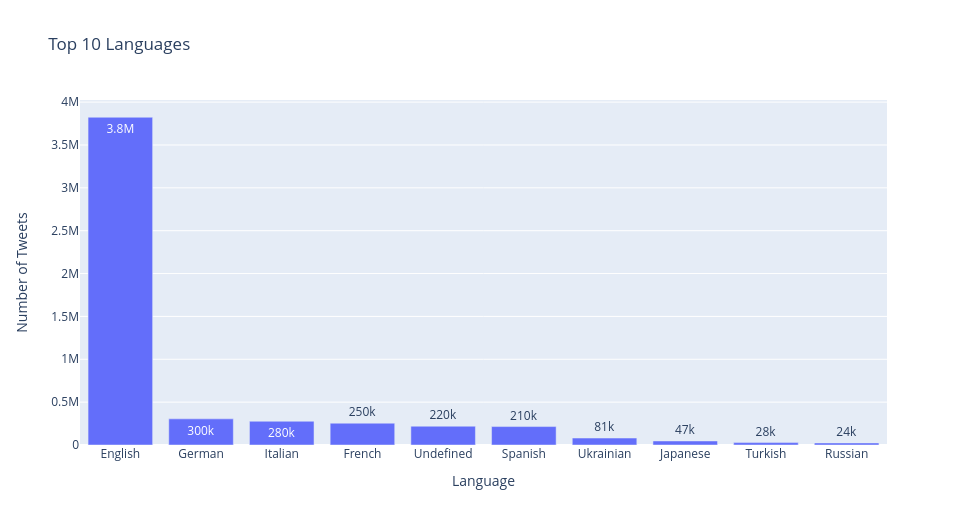

This plot shows the frequency of hashtag usage from March 2022 - November 2022. These align with major events that took place during the war. For example, May was the time when almost all major businesses started pulling out of Russia and that is visible with a high usage of the hashtag 'business'in this plot.

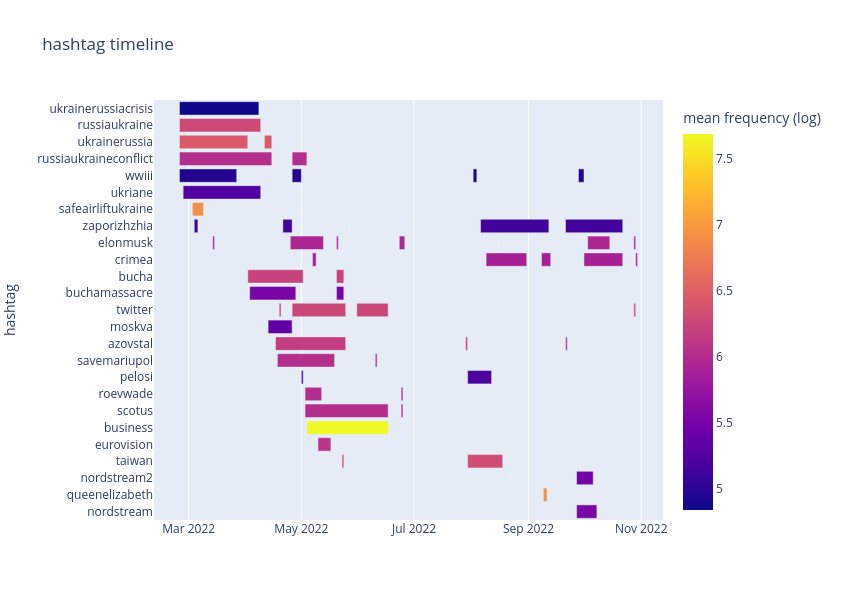

This plot is of a Word Cloud of the dataset. This shows the most common words used in tweets. As expected, Ukraine and Russia are the two most frequently used words.

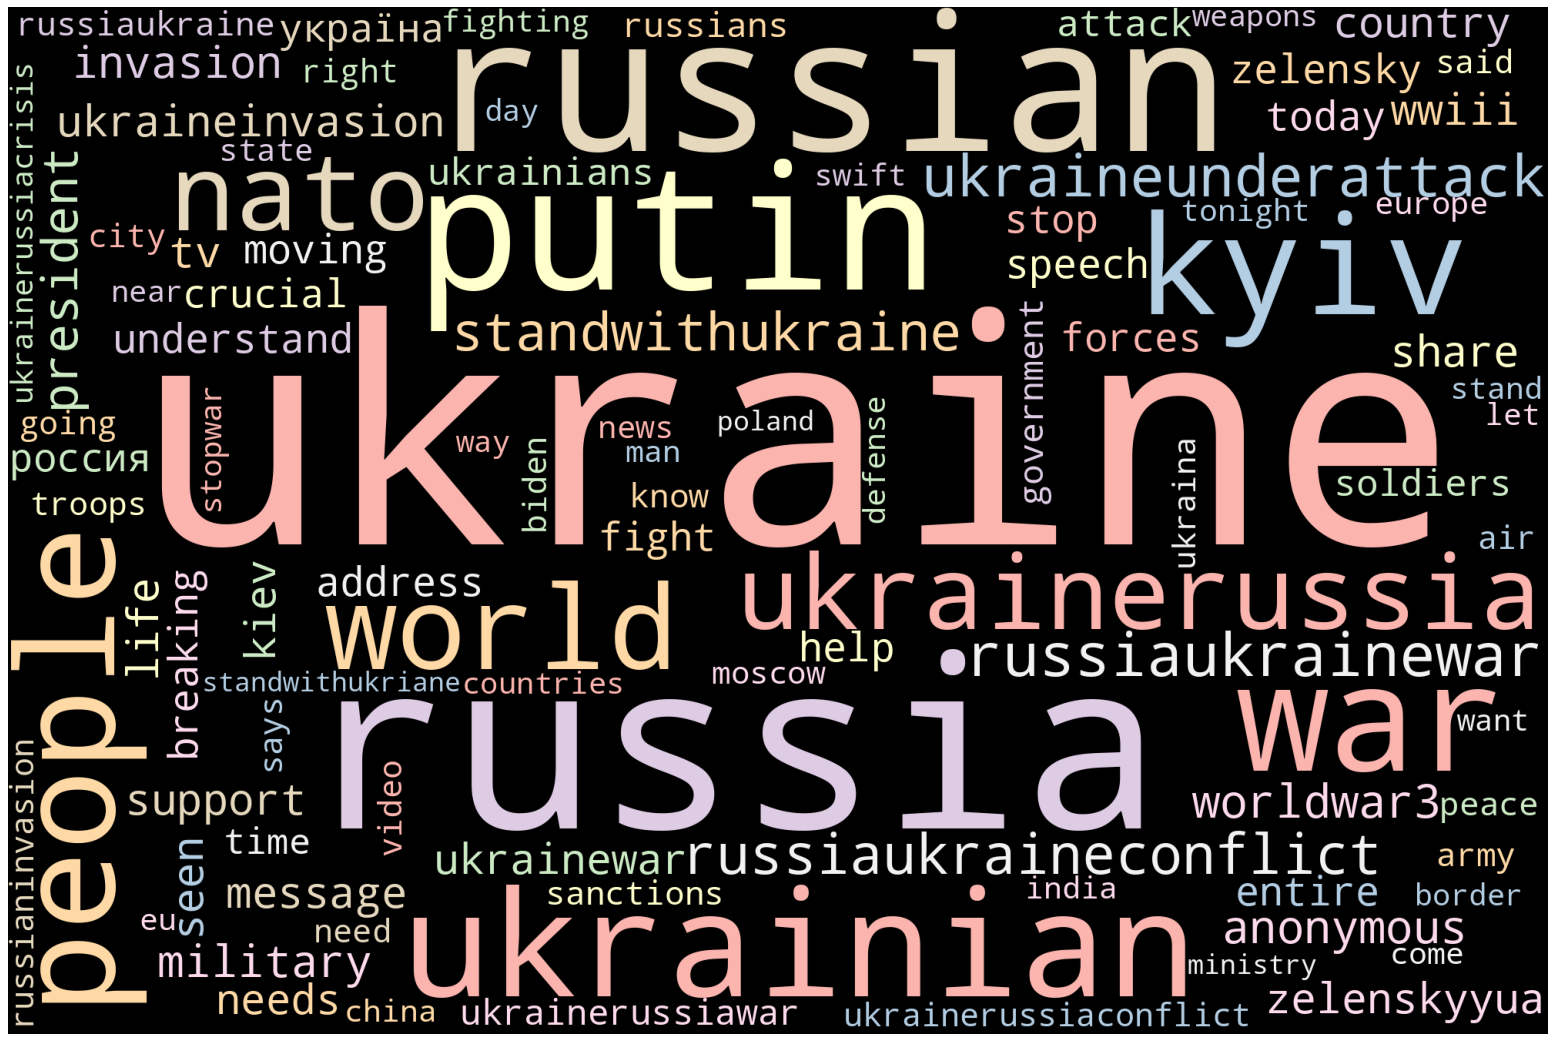

This plot shows the country-wise breakdown of tweets after the countries filtering. USA makes up the major chunk of the dataset with other countries having significantly less number of tweets. Another interesting point to note here is that Ukraine has significantly more tweets than Russia.

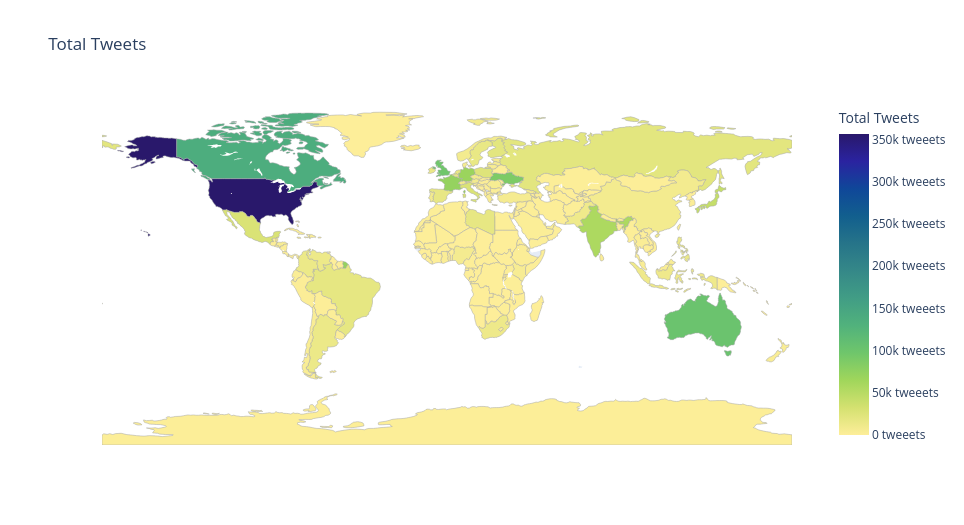

The next two plots show country-wise distribution of the amount of spam cleared by our spam filtering algorithm in March 2022 and April 2023. Since US has the most number of tweets, it also has the most number of spam.

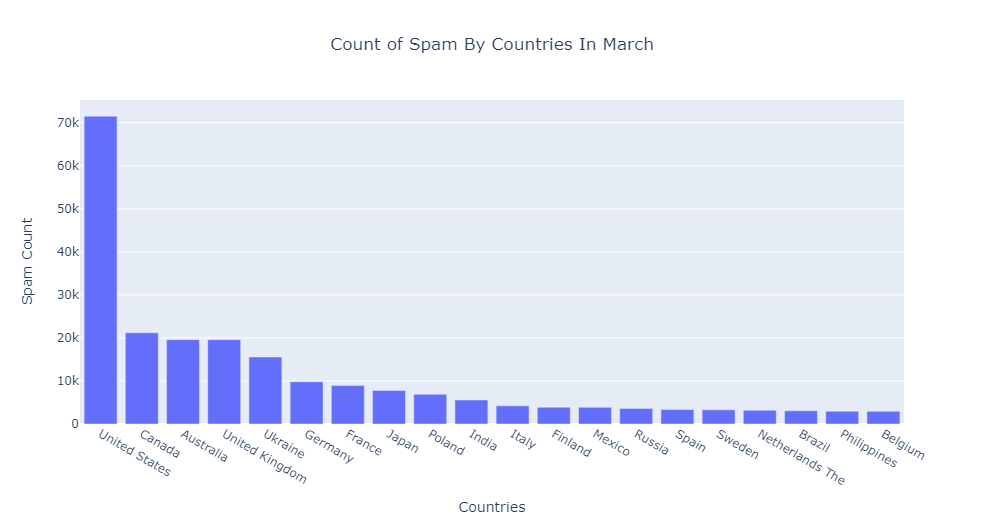

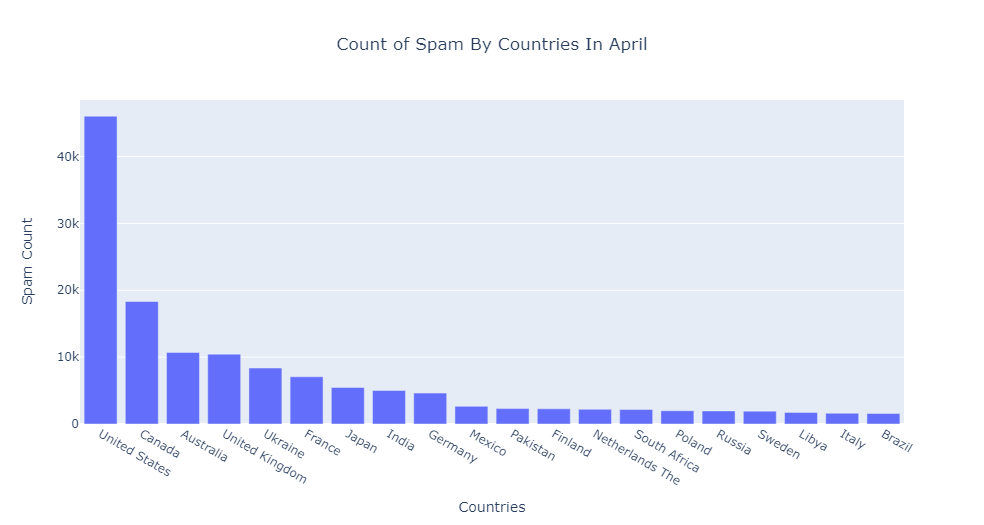

The next two plots show the country-wise sentiment plotted on a world map. By this plot, it would seem that overall the world is more pro Ukraine than pro Russia. However, it must be noted that the dataset is majorly skewed towards USA and so the plots of other countries cannot be trusted entirely. Moreover in order to save on compute time while processing massive amounts of data, we have chosen a less reliable but significanlty faster algorithm to get sentiment scores.

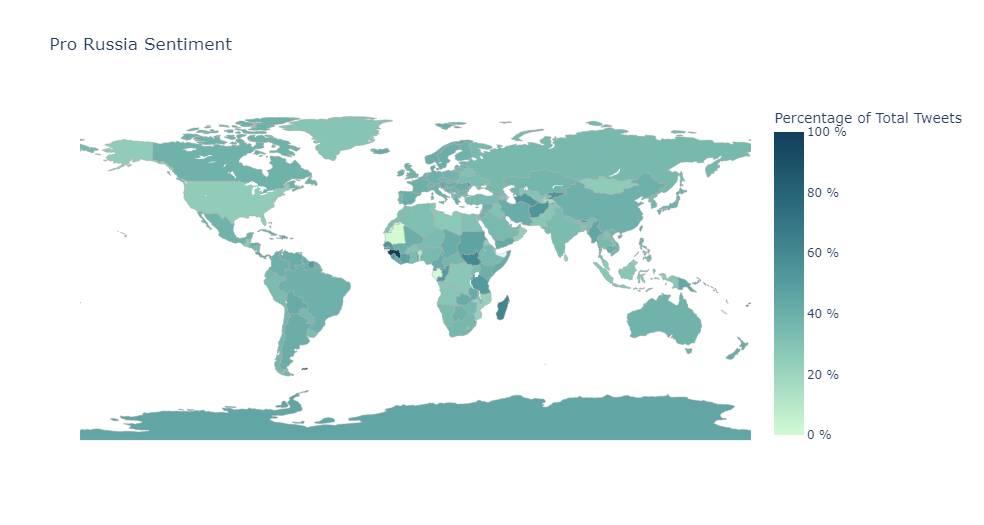

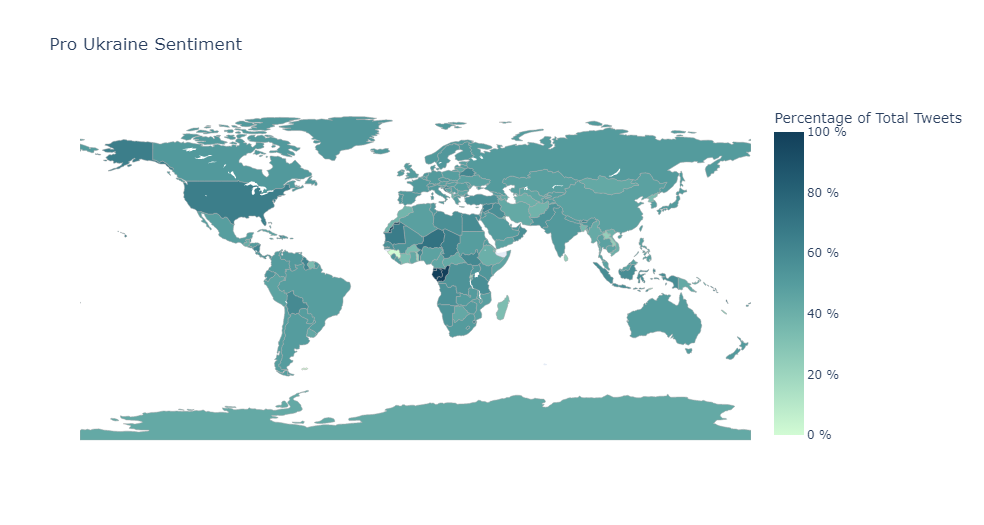

The next two plots analyze the sentiment scores of USA and India since both countries have major elections coming up in 2024. We attempt to better understand government policy and based on the change in sentiment in a year, try and propose policy changes for a more favorable election outcome to the incumbent candidates in both countries.

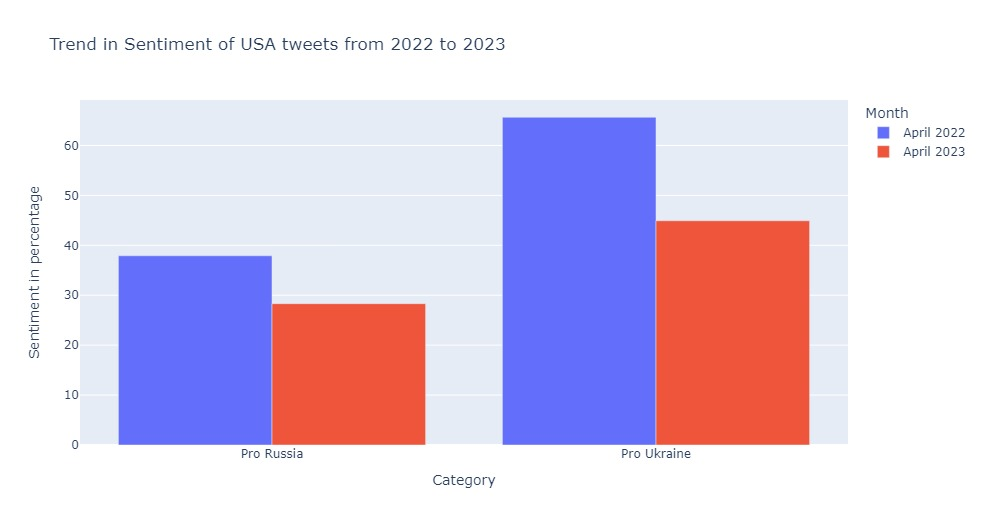

According to this plot at the start of the war, USA was majorly pro Ukraine. This explains the massive amounts of government spending towards the war in the form of economic and military aid. However, over the course of a year, pro ukraine sentiment seems to have significantly gone down although it still retains it's majority. At the same time, pro Russia sentiment also seems to have gone down a bit. This indicates that more people seem to be neutral on the issue and possibaly want an end to the war. 

Based on this graph, the current US government should now start turning their attention towards brokering a peace deal between the two countries while dialing down their support for Ukraine.

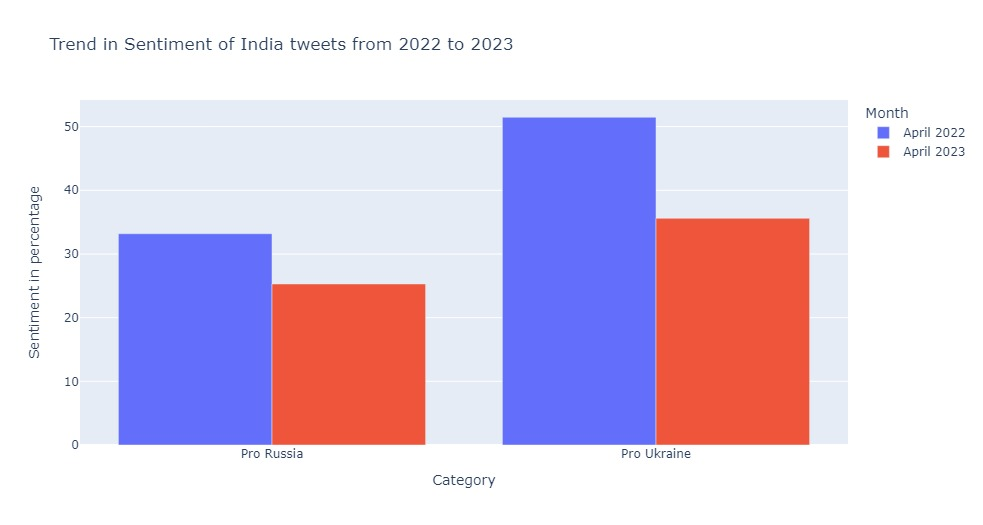

Accoring to this graph, India is also majorly pro Ukraine with around 52% of the population being pro Ukraine with only arpund 33% being pro Russia. This does not seem to align with the Indian government's policy of neutrality with some western scholors even calling it as pro Russia. Like USA, over the course of a year even Indian pro Ukraine sentiment has taken a hit with a slight reduction in pro Russia sentiment. In April 2023, it would seem that around 40% Indians are neutral in this conflict.

Based on this graph, the current Indian leadership should also make efforts to bring peace to Ukraine. However, high amount pro Ukraine sentiment would suggest that if not military, India should atleast consider dialing up it's economic aid to Ukraine.

It is important to note that Indian tweets amount to about 100k tweets whereas the population of India is believed to be around 1.4 billion. Hence, sentiment data on India might not be as reliable as that of the USA which has more than 350k tweets with a population of 331 million.

## 8. Miscellaneous

Please note that the code provided below this cell is not meant to be executed. Running the code will result in an error. Its purpose is to showcase various techniques that were attempted but proved unsuccessful due to computational limitations.

## 8.1 Sentiment Analysis Using Transformer Model

In [ ]:

%matplotlib inline 
import numpy as np
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import preprocessing
from sklearn.decomposition import PCA

import seaborn as sns
from textblob import TextBlob
import spacy
import re
import nltk
nltk.download('punkt')

In [ ]:
# Load the csv file into the pandas dataframe
twitter_df = pd.read_csv('/content/rus_uk_twitter_data/0417_UkraineCombinedTweetsDeduped.csv.gzip',compression ='gzip')
# Output the first few rows of twitter_df
twitter_df.head()
# Create a new Dataframe with the desired column names and default values of 0
new_df = pd.DataFrame({
    'acctdesc': twitter_df['acctdesc'],
    'pro_russia': [0] * len(twitter_df),
    'pro_ukraine': [0] * len(twitter_df),
    'against_russia': [0] * len(twitter_df),
    'against_ukraine': [0] * len(twitter_df),
    'neutral': [0] * len(twitter_df),
    'sentiment': [0] * len(twitter_df)
})
# Output the first few rows of the new Dataframe
new_df.head()


Russian and Ukrainian famous locations

In [ ]:
import spacy
# loading pre-trained model

nlp = spacy.load("en_core_web_sm")
# list of russian and ukrainian cities
russia_locations = ["moscow", "stpetersburg", "novosibirsk", "ekaterinburg", "nizhny novgorod", 
                    "kazan", "chelyabinsk", "omsk", "samara", "rostov-on-don", "ufa", "krasnoyarsk", 
                    "perm", "voronezh", "volgograd", "krasnodar", "saratov", "tyumen", "tolyatti", 
                    "izhevsk", "barnaul", "ulyanovsk", "irkutsk", "vladivostok", "yaroslavl", 
                    "makhachkala", "tomsk", "orenburg", "kemerovo", "naberezhnye chelny", "penza", 
                    "ryazan", "astrakhan", "belgrade",  "moskva", "sankt-peterburg","feodosia", "komsomolsk",
                     "krasnyi lyman", "ladyzhyn", "lisichansk", "Orenburg","Veliky Novgorod","Nizhny Novgorod","Cheboksary","Tver","Perm"]
ukraine_locations =["Kyiv" , "Kharkiv", "Odesa","Dnipro","Lviv","Kryvyi Rih",
                    "Mykolaiv","Vinnytsia","Chernihiv","Kherson","Poltava","Khmelnytskyi",
                    "Chernivtsi","Zhytomyr","Kamianske","Ternopil","Nikopol","Zaporizhzhia","Donetsk","Rivne","Sumy","Ivano-Frankivsk",
                    "Kropyvnytskyi","Kremenchuk","Lutsk","Bila Tserkva","Kramatorsk","Uzhhorod","Brovary","Sloviansk","Pavlohrad",
                    "Mukachevo","Konotop","Drohobych","Bakhmut","Novomoskovsk","Kovel","Smila","Kalush","Pervomaisk","Kolomyia",
                    "Chornomorsk","Izium","Fastiv","Lubny","Svitlovodsk","Varash","Dubno","Bucha","Boyarka","Sambir","Avdiivka","Synelnykove",
                    "Zolochiv","Koziatyn","Nadvirna","Vilnohirsk","Krolevets","Dolyna","Kalynivka","Karlivka","Pidhorodne"]
                   


Helps in locating if the text is related to Russia or ukraine based on the locations mentioned in the text. We use the above cities mentioned here.

In [ ]:
# The following method is used for locating if the mention in the text is about Russia or ukraine based on the location mentioned in the text
def locate_mentions(comment):
  # Load the spacy model for English Language
    doc = nlp(comment)
  # Initialize an empty list for storing the detected entities
    entities = []
  # Loop through all the named entities detected by the spacy model
    for ent in doc.ents:
        # Check if the named entity is a geographic location 
        if ent.label_ == "GPE":
          # Check if the entity text contains the word "russia" or any location from the russia_locations list
            if "russia" in ent.text.lower() or any(loc.lower() in ent.text.lower() for loc in russia_locations):
               # Add russia to the list of detected entities
                entities.append("Russia")
          # Check if the entity text contains the word "ukraine" or any location from the ukraine_locations list
            elif "ukraine" in ent.text.lower() or any(loc.lower() in ent.text.lower() for loc in ukraine_locations):
                # Add ukraine to the list of detected entities
                entities.append("Ukraine")
        # Check if the named entity is a location 
        elif ent.label_ == "LOC":
          # Check if the entity text contains any location in the russia_locations list
            if any(loc.lower() in ent.text.lower() for loc in russia_locations):
                # Add russia to the list of detected entities
                entities.append("Russia")
          # Check if the entity text contains any location in the ukraine_locations list
            elif any(loc.lower() in ent.text.lower() for loc in ukraine_locations):
               # Add ukraine to the list of detected entities
                entities.append("Ukraine")
# Loop through all the tokens in the document        
    for token in doc:
      # Check if the token is a proper noun
        if token.pos_ == "PROPN":
          # Check if the token text contains the word "russia" or any location in the russia_locaations list
            if "russia" in token.text.lower() or any(loc.lower() in token.text.lower() for loc in russia_locations):
                # Add russia to the list of detected entities
                entities.append("Russia")
          # Check if the token text contains the word "ukraine" or any location in the ukrain_locations list 
            elif "ukraine" in token.text.lower() or any(loc.lower() in token.text.lower() for loc in ukraine_locations):
               # Add ukraine to the list of detected entities
                entities.append("Ukraine")
          # Check if the token text matches any location in the  russian_locations list      
        elif token.text.lower() in [loc.lower() for loc in russia_locations]:
           # Add russia to the list of detected entities
            entities.append("Russia")
          # Check if the token text matches any location in the ukraine_locations list
        elif token.text.lower() in [loc.lower() for loc in ukraine_locations]:
            # Add ukraine to the list of detected entities
            entities.append("Ukraine")
    # Returns the list of detected entities with duplicates removed
    return list(set(entities))


Judge() function is used for providing sentiment scores for the text after detecting if the sentence is regarding russia or ukraine or none of them based on russian or ukranian locations and russian or ukranian famous people, and it also helps in providing us if the text is neutral , pro - russia , against - russia , pro - ukraine or against - ukraine using the sentiment scores and checking if the sentence is related to russia or ukraine.

In [ ]:
# The following method is used for providing sentiment scores for the text after detecting the sentence if it is regarding russia or ukraine or none of them,  and it also helps in providing us if the text is neutral , pro - russia , against - russia , pro - ukraine or against - ukraine
def judge(comment):
    # Initialize the TextBlob object
    print(comment)
    blob = TextBlob(comment)
    
    # Define the famous people and their countries
    russia_famous = {'putin': 'russia', 'medvedev': 'russia', 'lavrov': 'russia'}
    ukraine_famous = {'poroshenko': 'ukraine', 'zelensky': 'ukraine', 'tymoshenko': 'ukraine'}
    
    # Define the categories and their corresponding score ranges
    categories = {'pro_russia': (0.1, 1), 'against_russia': (-1, -0.1),'pro_ukraine':(0.1,1),'against_ukraine':(-1,-0.1),'neutral':(0.1,1)}
    
    # Initialize the category scores to zero
    category_scores = {category: 0 for category in categories}
    
    # Check if Russia locations or Ukraine locations are mentioned in the comment
    entities = locate_mentions(comment)
    

    
    # Loop over each sentence
    for sentence in blob.sentences:
        # Convert the sentence to lowercase
        sentence = str(sentence).lower()
        
        # Initialize flag variables for whether each country was mentioned in the sentence
        russia_mentioned = False
        ukraine_mentioned = False
        russia_ment= False 
        russia_menti = False
        ukraine_ment= False 
        ukraine_menti = False
        # Check if the sentence contains the name of a famous person from Russia or Ukraine
        for famous,country in russia_famous.items():
            if famous in sentence:
                russia_ment = True
            
                break
        for famous, country in ukraine_famous.items():
            if famous in sentence:
                ukraine_ment = True
                break
      # Check if the sentence mentions Russia or Ukraine locations
        en = locate_mentions(comment)
        russia_menti = "Russia" in en
        ukraine_menti = "Ukraine" in en
        # Determine the sentiment of the sentence
        sentiment = TextBlob(sentence).sentiment.polarity
        if russia_ment or russia_menti:
          russia_mentioned = True
        if ukraine_ment or ukraine_menti:
          ukraine_mentioned = True
        # Update the score for the corresponding categories based on the sentence sentiment and country mentioned
        if russia_mentioned:
         if sentiment > 0.1:
          category_scores['pro_russia'] += 1
         else:
          category_scores['against_russia'] += 1
        
        if not russia_mentioned:
          if ukraine_mentioned:
             if sentiment > 0.1:
              category_scores['pro_ukraine'] += 1
             else:
              category_scores['against_ukraine'] += 1
        # Check if only one category score is 1, and update the opposite category to 1
        if category_scores['pro_russia'] == 1:
          category_scores['against_ukraine'] = 1
        elif category_scores['against_russia'] == 1:
          category_scores['pro_ukraine'] = 1
        if category_scores['pro_ukraine'] == 1:
          category_scores['against_russia'] = 1
        elif category_scores['against_ukraine'] == 1:
          category_scores['pro_russia'] = 1
        # If neither russia or ukraine is detected based on the locations and the famous people, we mark the sentence as neutral
        if not russia_mentioned:
          if not ukraine_mentioned:
            category_scores['neutral'] = 1


     
    # Determine the category with the highest score
    max_category = max(category_scores, key=category_scores.get)
    
    # Return the category with the highest score
    return category_scores,sentiment


In [ ]:
# Drop rows with missing 'acctdesc' values and convert the column to string type 
new_df = new_df.dropna(subset=['acctdesc'])
new_df['acctdesc'] = new_df['acctdesc'].astype(str)
# Define a function for applying "judge" function and add sentiment score to the category scores
def judge_and_score(comment):
    category_scores, sentiment = judge(comment)
    category_scores.update({'sentiment': sentiment})
    return pd.Series(category_scores)
# Add a new column "numbers" as a sequence of integers from 1 to the length of new_df
new_df['numbers'] = range(1, len(new_df)+1)
# Apply the "judge_and_score" function to "acct_desc" column and add new columns for each category and sentiment score
new_df[['pro_russia', 'pro_ukraine', 'against_russia', 'against_ukraine', 'neutral', 'sentiment']] = \
    new_df['acctdesc'].apply(lambda x: judge_and_score(x))


The labelled dataset is downloaded as output.xlsx file.

In [ ]:
import pandas as pd

# write the dataframe to an Excel file
new_df.to_excel('output.xlsx', index=False)

# read the Excel file and print the first few rows
df = pd.read_excel('output.xlsx')
print(df.head())


Transformers Library is used for the Transformer Model.

In [ ]:
# Install the transformers library
!pip install transformers
# import the required libraries
import torch
from transformers import pipeline

# Load the sentiment analysis pipeline
nlp = pipeline("sentiment-analysis")

# Define an input text for sentiment analysis
text = "I love this product!"

# Run sentiment analysis on the input text
output = nlp(text)

# Print the sentiment analysis results
print(f"Sentiment: {output[0]['label']}, Score: {output[0]['score']}")


Custom Transformer Model :

1. Embedding Layer: Token Sequences are mapped to continuous vectors representing high dimensional space.

2. Transformer Layers: Multi-Head Attention Layer and feed-forward layers for capturing complex dependencies between the words in the input sequence

3. Aggregation Layer: A Global Average Pooling layer for aggregating the outputs of the Transformer layers, creating a fixed-size vector representation of the input sequence.

4. Prediction Layer: Dense final layer is applied to the aggregated vector to generate the sentiment predictions (e.g., pro-Russia, pro-Ukraine, against-Russia, against-Ukraine, and neutral).

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.layers import Embedding, MultiHeadAttention, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
def create_transformer_model(max_len, vocab_size, num_classes):
    # Define Input layer
    inputs = Input(shape=(max_len,), dtype=tf.int32)

    # Define Embedding layer
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=128)
    x = embedding_layer(inputs)

    # Define Transformer layers
    num_heads = 8
    transformer_units = [
        64, 32
    ]
    dropout_rate = 0.1
    for i in range(len(transformer_units)):
        #  Add Multi-head attention layer
        x = MultiHeadAttention(num_heads=num_heads, 
                               key_dim=64, 
                               dropout=dropout_rate)(x, x)

        # Add layer normalization layer
        x = LayerNormalization()(x)

        # Add Feedforward layer
        x = Dense(units=transformer_units[i], activation='relu')(x)

        # Add another Normalization layer
        x = LayerNormalization()(x)

        # Add Dropout layer
        x = Dropout(rate=dropout_rate)(x)

    # Add Global average pooling layer
    x = GlobalAveragePooling1D()(x)

    # Define Output layer
    outputs = Dense(units=num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model with Adam optimizar and categorical cross entropy loss 
    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model





In [ ]:
import numpy as np
import tensorflow as tf

# Load the data

# Extract the comments and labels
comments = new_df['acctdesc'].values
labels = new_df[['pro_russia', 'pro_ukraine', 'against_russia', 'against_ukraine', 'neutral']].values

# Convert labels to one-hot encoding
labels = np.argmax(labels, axis=1) # Convert the labels to integers 
labels = tf.keras.utils.to_categorical(labels, num_classes=5) # One-hot encoded labels

# Tokenize the comments
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(comments) # Fit the tokenizer on the comments 
sequences = tokenizer.texts_to_sequences(comments) # Convert comments to sequences of integers
max_len = max([len(seq) for seq in sequences]) # Determine the maximum sequence length
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len) # Pad sequences to the same length

# Split the data into train and test sets
train_size = int(0.8 * len(sequences)) # Set the size of the training set to 80% of the data
train_sequences = sequences[:train_size] # split the sequences into the training set
train_labels = labels[:train_size] # split the labels into the training set
test_sequences = sequences[train_size:] # split the sequences into the test set 
test_labels = labels[train_size:] # split the labels into the test set.


Model Training and Accuracy

In [ ]:
# Define the maximum sequence length , vocabulary size, and number of classes
max_len = 40
vocab_size = len(tokenizer.word_index) + 1
num_classes = 5
# Create a transformer model using the provided function
model = create_transformer_model(max_len, vocab_size, num_classes)


# Split data into training and testing sets using a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(train_sequences, train_labels, test_size=0.3)

# Train the model on the training set, using the validation set for early stopping
model.fit([X_train, X_train], y_train, batch_size=32, epochs=10, validation_data=([X_test, X_test], y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate([test_sequences, test_sequences], test_labels)
# Print the test accuracy
print('Test accuracy:', test_acc)


Time Series Analysis

In [ ]:
def plot_series(x, y, format="-", start=0, end=None, 
                title=None, xlabel=None, ylabel=None, legend=None ):
""" 
Helps in visualizing Time series data concerning Tweet's sentiment score
Arguments : x (array of integers ) : consists of values for the x- axis : Days
y (array of integers or tuple of arrays ) : consists of the values for the y-axis : Sentiment Score
format : (string): line style for plotting the graph
label : (string ): tag for the line
start : (int) : first time step for plotting
end : (int) : last time step for plotting
title : (string) : plot's title
xlabel : (string) : x-axis label 
ylabel : (string) : y-axis label
legend : (list of strings) : legend for the plot
"""

    # Helps in setting up graph dimensions
    plt.figure(figsize=(10, 6))
    
    # Verifying if there are more than two series for plotting
    if type(y) is tuple:

      # Looping over the y elements
      for y_curr in y:

        # Plotting the x values and current y values 
        plt.plot(x[start:end], y_curr[start:end], format)

    else:
      # Plotting the x and y values
      plt.plot(x[start:end], y[start:end], format)

    #Labeling x_axis
    plt.xlabel(xlabel)

    # Labeling y-axis
    plt.ylabel(ylabel)

    # Setting the legend
    if legend:
      plt.legend(legend)

    # Setting the title
    plt.title(title)

    # Overlaying a grid for the graph
    plt.grid(True)

    # Graph drawn on screen
    plt.show()

In [ ]:
# Reading the data from excel file using the pandas where the first column in the Excel file should be used as the index (i.e., row labels) of the DataFrame.
df = pd.read_excel('/content/output.xlsx',index_col= 0)

# Creates a one dimensional NumPy array called "series" containing the values extracted from the "sentiment" column of the Pandas Dataframe.
series = df['sentiment'].values
# Creates a time axis for the sentiment values where the resulting time array contains a sequence of integers from 0 to len(series)-1.
time = np.arange(len(series))
# Plotting the sentiment values over time
plt.plot(time, series)
# Labeling x axis as Date
plt.xlabel('Date')
# Labeling y axis as Value
plt.ylabel('Value')
# Graph drawn on screen
plt.show()
# Plot a time series of daily sentiment values with the custom x- and y-labels, helps in plotting time series of sentiment values against the "time" array
plot_series(time, series, xlabel='Days', ylabel='Daily Sentiment Value')
# Plot a time series of daily sentiment values with default labels and plot a time series of sentiment values against the "time" array.
plot_series(time,series)

In [ ]:
# Split the time axis into training and validation sets
split_time = 2400
# Creates the training and validation sets for the time axis and the sentiment values 
time_train = time[:split_time]
time_valid = time[split_time:]
x_train = series[:split_time]
x_valid = series[split_time:]

In [ ]:
# Size of the sliding window for creating input sequences
window_size= 30
# Number of samples per batch (number of samples processed in each training batch)
batch_size=32
#Size of the shuffle buffer for the training data for randomly shuffling the data in the training set preventing overfitting and ensuring the model learns from a representative sample of the data
shuffle_buffer_size= 1000

Dataset is split into small chunks of windowed dataset.

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  """ Helps in Generating the dataset windows.
  Arguments :
  1. series: (array of float values) : contains the time series values
  2. window_size: (int) : Number of time steps included in the feature
  3. batch_size: (int) :  Batch size
  4. shuffle_buffer: (int) : buffer size used for the shuffle method.

  Returns : 
  Dataset (TF Dataset) : TF Dataset containing time windows
    """
    # Generating a TF Dataset from the series values
    dataset = tf.data.Dataset.from_tensor_slices(series)
    
    # Window the data, taking only the one with the specified size  
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    
    # Flatten the windows by putting window's elements in a single batch
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))

    # Tuples created with features and labels 
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))

    # Windows being shuffled
    dataset = dataset.shuffle(shuffle_buffer)
    
    # Batches of Windows created
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset


Time Series Forecasting Model:

1.  Convolutional Layer
2. LSTM layer
3. Dense Layer 
4. Output Dense Layer
5. Lambda Layer

CNN and LSTM layers allow the model to learn local and temporal patterns in the Time series data.

In [ ]:

# Dataset Windows generated :
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
# Sequential model with a stack of layers
model = tf.keras.models.Sequential([
    # Convolutional layer with 64 filters, kernel size of 3, ReLU activation, and input shape of [window_size,1]
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      input_shape=[window_size, 1]),
# LSTM Layer with 64 units and return sequences                      
  tf.keras.layers.LSTM(64, return_sequences=True),
# LSTM Layer with 64 units
  tf.keras.layers.LSTM(64),
# Dense Layer with 30 units and ReLU activation
  tf.keras.layers.Dense(30, activation="relu"),
# Dense Lyer with 10 units and ReLU activation
  tf.keras.layers.Dense(10, activation="relu"),
# Output Dense layer with 1 unity and linear activation
  tf.keras.layers.Dense(1, activation="linear"),
# Lambda Layer that multiplies the output by 400
  tf.keras.layers.Lambda(lambda x: x * 400)
])

# Model Summary Printed:
model.summary()


Learning Rate Scheduler for checking appropriate learning rate.


In [ ]:
# Set the learning rate scheduler to increase learning rate over time
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))

# Initialize the optimizer with stochastic gradient descent (SGD) and momentum of 0.9 
optimizer = tf.keras.optimizers.SGD(momentum=0.9)

# Set the training parameters and compile the model with Huber Loss and the initialized optimizer
model.compile(loss=tf.keras.losses.Huber(), optimizer=optimizer)

# Train the model on the training set for 100 epochs with the learning rate scheduler as a callback
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

In [ ]:
# An array of learning rates using exponential scaling from 1e-8 to 1e-3  
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Size of the figure is set to be 10 inches by 6 inches
plt.figure(figsize=(10, 6))

# Enable the grid on the plot
plt.grid(True)

# Plot the loss as a function of learning rate using a log scale for the x-axis 
plt.semilogx(lrs, history.history["loss"])

# Increase the size of the tickmarks on the plot
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries to zoom in on the interesting region of the plot
plt.axis([1e-8, 1e-3, 0, 100])

In [ ]:
# Clear the Keras session for ensuring a fresh start
tf.keras.backend.clear_session()

# Build the Model and define the model architecture as a sequential stack of layers
model = tf.keras.models.Sequential([
    # Add a full connected dense layer with 30 neurons and ReLU activation taking input with shape [window_size]
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"),
    # Add a fully connected dense layer with 10 neurons and ReLU activation function
    tf.keras.layers.Dense(10, activation="relu"),
    # Add a final fully connected denslayer with 1 neuron (output layer)   
     tf.keras.layers.Dense(1)
])

Model Forecasting

In [ ]:
def model_forecast(model, series, window_size, batch_size):
    """The following method uses an input model for generating predictions on data windows

    Arguments:
      model (TF Keras Model) - model that accepts data windows
      series (array of float) - contains the values of the time series
      window_size (int) - the number of time steps to include in the window
      batch_size (int) - the batch size for generating predictions

    Returns:
      forecast (numpy array) - array containing predictions for the input series
    """

    # Convert the series into a TensorFlow Dataset
    dataset = tf.data.Dataset.from_tensor_slices(series)

    # Window the data but only take the ones with the specified size
    dataset = dataset.window(window_size, shift=1, drop_remainder=True)

    # Flatten the windows by putting its elements into a single batch
    dataset = dataset.flat_map(lambda w: w.batch(window_size))
    
    # Group the flattened windows into batches of size: batch_size
    dataset = dataset.batch(batch_size).prefetch(1)
    
    # Get predictions for the entire dataset using the input model
    forecast = model.predict(dataset)
    
    return forecast

Appropriate Learning Rate for the DNN Time series model.

In [ ]:
# We set the learning rate to the following value by observing the above graph and select the approximate point after which the loss becomes unstable
learning_rate = 1e-5

# Set the optimizer using the Stochastic Gradient Descent (SGD) optimizer with specified learning rate and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters by defining the loss function, optimizer and evaluation metric
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

# Train the model using the training set and the specified parameters, keeping track of the training history
history = model.fit(train_set,epochs=100)

Forecast series Prediction and Plot for validation set and the predicted values from the model.

In [ ]:
# Reduce the original series for excluding the validation period and the extra window_size data
forecast_series = series[split_time-window_size:-1]

# Generate predictions using the trained model on the forecast series
forecast = model_forecast(model, forecast_series, window_size, batch_size)

# Remove the single-dimensional axis
results = forecast.squeeze()

# Plot the actual values of the validation set and the predicted values from the model
plot_series(time_valid, (x_valid, results))

## 8.2 Spam detection using Hugging Face pre-trained model

This spam detection is the second kind of detection where we are detecting promotional tweets which do not contribute towards Russia Vs Ukrain war.

In [ ]:
pip install 'transformers[tf-cpu]'

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda') 
tokenizer = AutoTokenizer.from_pretrained("mariagrandury/roberta-base-finetuned-sms-spam-detection")
model = AutoModelForSequenceClassification.from_pretrained("mariagrandury/roberta-base-finetuned-sms-spam-detection").to(device)
# next(model.parameters()).is_cuda

def spam_detect(sent):
    token = tokenizer(sent, return_tensors='pt', padding=True)
    input_ids = token["input_ids"].to(device)
    attention_mask = token['attention_mask'].to(device)
    pred_tensor = model(input_ids=input_ids, attention_mask=attention_mask).logits
    pred = torch.sort(pred_tensor).indices[:, 1]
#     print("pred:", pred)
    return pred

The following code is used for translating tweet originally in russian/ ukranian to english

In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
from googletrans import Translator, constants


In [ ]:
def translate_func(sent, translator):
    try:
        val = translator.translate(sent).text
    except:
        val = np.nan
    return val

In [ ]:
translator = Translator()

## 9. Datasets
Ukraine War Dataset - https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

Countries, States and Cities dataset - https://www.kaggle.com/datasets/tanweerulhaque/countries-states-cities-dataset